# Tarea 2: Exponentes de Lyapunov y universalidad

> Fecha de envío: 2 de julio
>
> Fecha de aceptación: 30 de julio

## Ejercicio 1:

Para la familia de mapeos cuadrática $Q_c(x) = x^2 + c$, generen el diagrama que
muestra el exponente de Lyapunov en términos de $c$, para $c\in[-2,2]$.
Utilizen un paso suficientemente fino (en $c$) para que el diagrama muestren
la riqueza del comportamiento.

- ¿Qué particularidad ocurre (en términos del exponente de Lyapunov) para los valores de $c$ donde hay bifurcaciones?

- ¿Qué particularidad ocurre (en términos del exponente de Lyapunov) cuando tenemos *ciclos superestables*, es decir, cuando $x=0$ es parte de un ciclo periódico?

### Respuesta:

In [133]:
#Respuesta

using TaylorSeries
using Plots


# Defino una función que calcula la derivad de una función empleando TaylorSeries.
function derf(f,a)
    t = Taylor1(eltype(a), 1)
    fT = f(a+t)
    return fT[1]
end

#Defino el mapeo cuadrático.
Q²(x,c)=x^2+c

Q² (generic function with 1 method)

In [193]:
# Primero defino una función que calcula el exponente de Lyapunov.

function lyapunov(f,n,x0)
    s=0
    xs=ones(Float64,n+1)
    xs[1]=x0
    for i in 0:n-1
        xs[i+2]=f(xs[i+1])
        xi=xs[i+1]
        t1=log(abs(derf(f,xi)))
        s=s+t1
    end
    #display(xs)
    return s/n
end     

# Checo si funciona.
lyapunov(x->(x^2)-3/4,10000,1e-20)

-0.005646711225700492

In [188]:
# Calculo el exponente de Lyapunov para un rango de c´s.

function lyapunovQPlt(ci,cf,m,x0)
    cs=range(ci,stop=cf,length=m)
    lyaL=ones(Float64,m)
    for k in 1:m
        c=cs[k]
        lyaL[k]=lyapunov(x->x^2+c,2000,x0)
    end
    
    display(lyaL)
    plot(cs,lyaL,xlabel="c",ylabel="λ(c,$x0)",label="",title="Exponente de Lyapunov del mapeo cuadrático",lw=2,color="green",alpha=0.7,legend=:bottomright)
    plot!([1/4,1/4],[-5,1.5],color="blue",label="c=1/4")
    plot!([0,0],[-5,1.5],color="purple",label="c=0")
    plot!([-3/4,-3/4],[-5,1.5],color="red",label="c=-3/4")
    plot!([-5/4,-5/4],[-5,1.5],color="red",label="c=-5/4")
    ylims!((-5,1.5))
    xlims!((ci,cf))
end

lyapunovQPlt (generic function with 2 methods)

Con la función `lyapunovQPlt(ci,cf,m,x0,limx)` visualizo el exponente de Lyapunov para $c\in [-2,2]$. Marco con líneas verticales rojas los valores de $c$ donde se tiene un doblamiento de periodo para el mapeo $Q^{2}_{c}(x)$. Aedmás, con líneas moradas marco los puntos donde tenemos cíclos superestables. 

Para poder observar el comportamiento del exponente de Lyapunov a detalle, grafico el intervalo $[-2,2]$ a pedazos.

2000-element Vector{Float64}:
 -0.33443776195968994
 -0.33641126114802716
 -0.33839033438058147
 -0.3403750110444847
 -0.3423653207591451
 -0.34436129337860766
 -0.3463629589937179
 -0.3483703479347075
 -0.35038349077344033
 -0.352402418325992
 -0.3544271616550101
 -0.3564577520723206
 -0.35849422114142515
  ⋮
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf

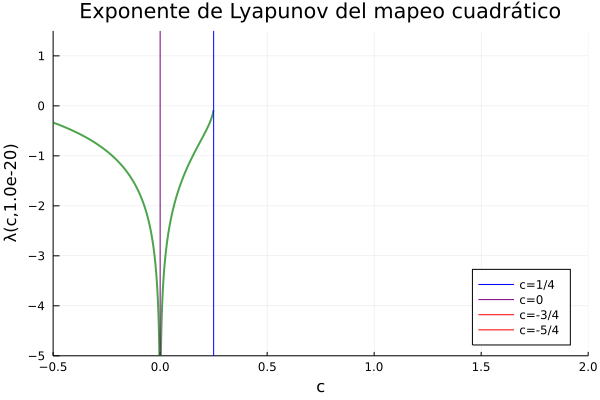

In [189]:
lyapunovQPlt(-1/2,8/4,2000,1e-20) # Podemos observar que $\lambda_{c}$ diverge para c>1/4.

2000-element Vector{Float64}:
 -0.027025573296984334
 -0.02690107972909386
 -0.026981880807659248
 -0.027195192584311502
 -0.027486281998843
 -0.027824404230359513
 -0.02819313081863274
 -0.028583221443910452
 -0.028989076543826604
 -0.02940706673080548
 -0.029834709127106573
 -0.03027023132604291
 -0.03071232427237651
  ⋮
 -0.18420676392525104
 -0.1761725989560845
 -0.1677977200801361
 -0.15902250758303535
 -0.14976803120798493
 -0.1399259687985905
 -0.1293405414371796
 -0.11777303234347125
 -0.10482252177854337
 -0.0897101980567168
 -0.07043996367059703
 -0.029075985918964195

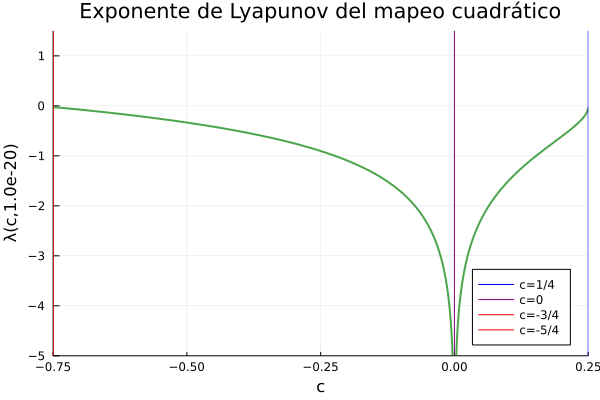

In [190]:
lyapunovQPlt(-3/4,1/4,2000,1e-20) # Podemos observar que $\lambda_{c}$ converge para c<1/4.

3000-element Vector{Float64}:
 -0.0260709880890225
 -0.026032556454626415
 -0.026543531760346534
 -0.027256855715111914
 -0.028059459954828524
 -0.02891205659330507
 -0.02979698928304426
 -0.030704831235027968
 -0.031629960689654416
 -0.032568757435152314
 -0.033518754678533616
 -0.03447819719012661
 -0.03544579258331118
  ⋮
 -0.18419231168312367
 -0.1761589341838163
 -0.16778486972200463
 -0.15901050359800142
 -0.14975691220693127
 -0.13991578254242143
 -0.12933134888105477
 -0.11776491472765283
 -0.10481559455255963
 -0.08970464350205708
 -0.07043613697574382
 -0.029075985918964195

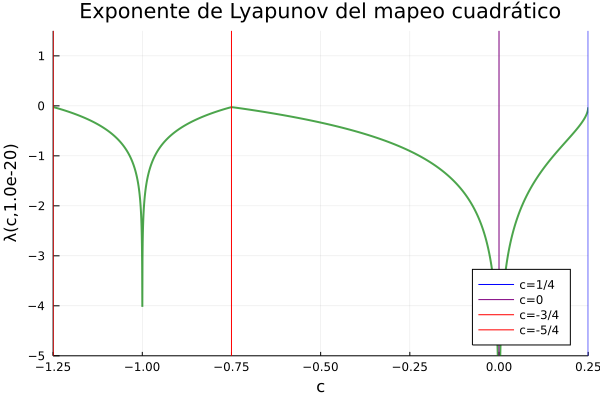

In [191]:
lyapunovQPlt(-5/4,1/4,3000,1e-20) 

4000-element Vector{Float64}:
  1.362921936599604
  0.6615410236459424
  0.6550126771684193
  0.6550253854686084
  0.65496524445506
  0.6500728130837405
  0.6559323852146709
  0.6413216246498198
  0.6369047784714246
  0.642132565209402
  0.6395562022066573
  0.6335172473525744
  0.6420654185699568
  ⋮
 -0.19475760024973185
 -0.18614576325956153
 -0.17717379772058922
 -0.1677784458129951
 -0.15787595112062047
 -0.14735135266484306
 -0.13603929782092478
 -0.12368634998999661
 -0.1098667634578154
 -0.09375322128054263
 -0.07322411945568447
 -0.029075985918964195

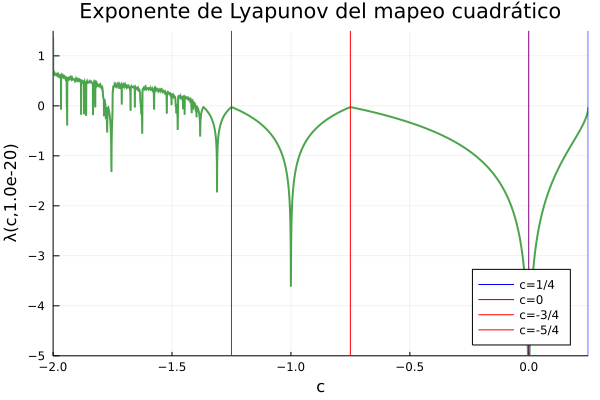

In [192]:
lyapunovQPlt(-2,1/4,4000,1e-20) 

Como podemos observar en el diagrama anterior, el exponente de Lyapunov calculado converge solamente para $c\leq \frac{1}{4}$, el cuál es el punto aparecen los puntos periódicos para el mapeo cuadrático. 
También, podemos ver que en los puntos dónde tenemos un doblamiento de periodo, la curva que caracteriza a $\lambda_{c}$ parece cambiar de concavidad. No solo esto, también parece que los puntos de doblamiento de periodo coinciden con un máximo local de $\lambda_{c}$.


Es interesante notar que dichos máximos locales siguen siendo negativos. Lo que esto nos indicaría es que, dado un punto $c'$ donde se sucede un doblamiento de periodo, podemos considerar un intervalo $[c'-\varepsilon,c'+\varepsilon]$ tal que $\forall c\in[c'-\varepsilon,c'+\varepsilon]$, $\lambda_{c}(x_{0})\leq 0$. Es decir, en un intervalo centrado en el punto de doblamiento de periodo tendremos comportamiento no caótico.


Las observaciones que hice arriba solo aplican para los puntos $c=-\frac{3}{4},\frac{5}{4}$. Si encontramos puntos de doblamiento de  periodo para los cuales $\lambda_{c}>0$, las conclusiones cambian.


Un último comentario. Del diagrama obtenido podemos concluir que el mapeo cuadrático presenta un comportamiento no caótico para $c\in[-\frac{3}{4},\frac{1}{4}]$.

***

Para identificar los valores $c$ donde tenemos ciclos superestables, podemos emplear la herramientas desarrolladas en el notebook de Universalidad.

In [123]:
# Primero definimos las iteraciones del mapeo cuadrado

function Qⁿc(x,c,n)
    if n == 1
        return Q²(x,c)
    else
        for k in 1:n
            x=Q²(x,c)
        end
        return x
    end
end

# Luego, como en la clase, empleamos series de Taylor para implementar el método de Newton. 

function roots_Newton(f,x0,its)
    for k in 1:its
        x0=x0-(f(x0)/derf(f,x0))
    end
    return x0
end

roots_Newton(c -> Qⁿc(0.0,c,8), -1.4, 400)

-1.3815474844320617

Ahora sí, procedo a hacer el diagrama para $\lambda_{c}(x_0)$ que muestre los valores de $c$ donde se tienen ciclos superestables. Dichos puntos se indican con líneas moradas.

In [200]:
function lyapunovQPlt_complete(ci,cf,m,x0)
    cs=range(ci,stop=cf,length=m)
    lyaL=ones(Float64,m)
    for k in 1:m
        c=cs[k]
        lyaL[k]=lyapunov(x->x^2+c,2000,x0)
    end
    plot(cs,lyaL,xlabel="c",ylabel="λ(c,$x0)",label="",title="Exponente de Lyapunov del mapeo cuadrático",lw=2,color="green",alpha=0.7,legend=:bottomright)
    plot!([1/4,1/4],[-5,1.5],color="blue",label="c=1/4")
    plot!([0,0],[-5,1.5],color="purple",label="c=0",alpha=0.6)
    plot!([-3/4,-3/4],[-5,1.5],color="red",label="c=-3/4")
    plot!([-5/4,-5/4],[-5,1.5],color="red",label="c=-5/4")
    
    # Calcula las c´s donde existen ciclos superestables
    
    for n in 1:12
        C = roots_Newton(c -> Qⁿc(0.0,c,2^n), -1.4, 400)
        println("n= ",n," c= ",C)
        plot!([C,C],[-5,1.5],label="",alpha=0.6,color="purple")
    end
    ylims!((-5,1.5))
    xlims!((ci,cf))
end

lyapunovQPlt_complete (generic function with 2 methods)

n= 1 c= -1.0
n= 2 c= -1.3107026413368328
n= 3 c= -1.3815474844320617
n= 4 c= -1.3969453597045602
n= 5 c= -1.4002530812147829
n= 6 c= -1.400253081214783
n= 7 c= -1.400253081214783
n= 8 c= -1.400253081214783
n= 9 c= -1.4002530812147829
n= 10 c= -1.400253081214783
n= 11 c= -1.400253081214783
n= 12 c= -1.400253081214783


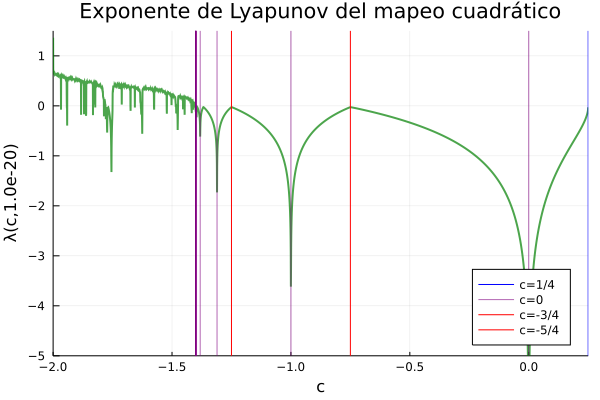

In [201]:
lyapunovQPlt_complete(-2,1/4,4000,1e-20)

n= 1 c= -1.0
n= 2 c= -1.3107026413368328
n= 3 c= -1.3815474844320617
n= 4 c= -1.3969453597045602
n= 5 c= -1.4002530812147829
n= 6 c= -1.400253081214783
n= 7 c= -1.400253081214783
n= 8 c= -1.400253081214783
n= 9 c= -1.4002530812147829
n= 10 c= -1.400253081214783
n= 11 c= -1.400253081214783
n= 12 c= -1.400253081214783


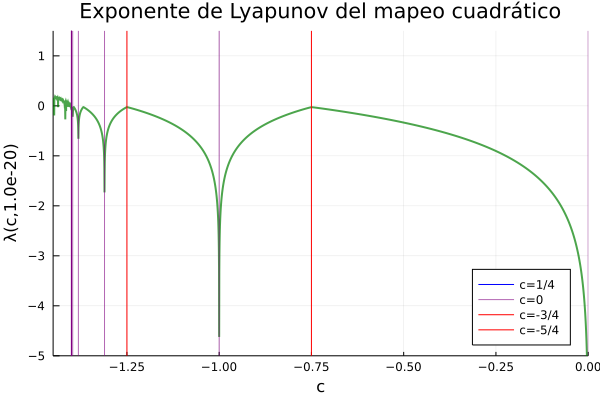

In [205]:
lyapunovQPlt_complete(-1.45,0,4000,1e-20)

n= 1 c= -1.0
n= 2 c= -1.3107026413368328
n= 3 c= -1.3815474844320617
n= 4 c= -1.3969453597045602
n= 5 c= -1.4002530812147829
n= 6 c= -1.400253081214783
n= 7 c= -1.400253081214783
n= 8 c= -1.400253081214783
n= 9 c= -1.4002530812147829
n= 10 c= -1.400253081214783
n= 11 c= -1.400253081214783
n= 12 c= -1.400253081214783


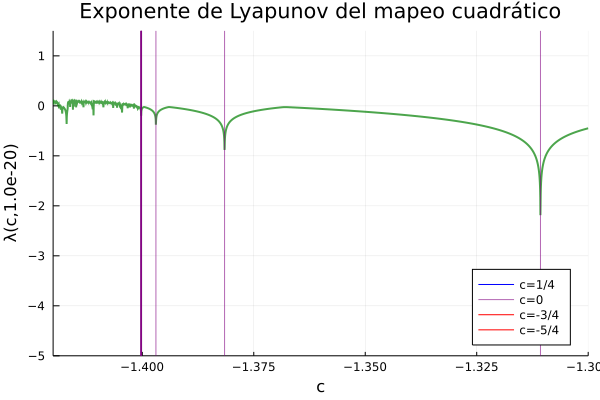

In [207]:
lyapunovQPlt_complete(-1.42,-1.3,4000,1e-20)

n= 1 c= -1.0
n= 2 c= -1.3107026413368328
n= 3 c= -1.3815474844320617
n= 4 c= -1.3969453597045602
n= 5 c= -1.4002530812147829
n= 6 c= -1.400253081214783
n= 7 c= -1.400253081214783
n= 8 c= -1.400253081214783
n= 9 c= -1.4002530812147829
n= 10 c= -1.400253081214783
n= 11 c= -1.400253081214783
n= 12 c= -1.400253081214783


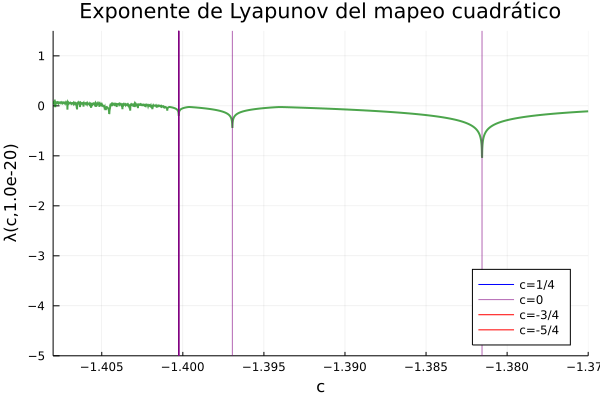

In [209]:
lyapunovQPlt_complete(-1.408,-1.375,4000,1e-20)

De los diagramas anteriores, podemos notar que los puntos $c$ que corresponden an ciclos superestables del mapeo cudrático coinciden con mínmos locales de la curva $\lambda_{c}(x_{0})$.  Es interesante notar que todos los puntos superestables que calculamos siguen corresponden a mínimos locales menores a cero.

Otro fenómeno interesante es los valores $c$ correspondientes a ciclos superestables paracen agruparse/amontonarse alrededor de $-1.4$.

***
***

## Ejercicio 2:

Llamaremos $c_n$ al valor del parámetro $c$ donde ocurre el ciclo superestable
de periodo $2^n$, esto es, el valor de $c$ donde $x_0=0$ pertenece a la órbita
periódica de periodo $2^n$. Algunos de estos valores fueron obtenidos
numéricamente en una de las notas de clase.
(De manera alternativa, pueden considerar que $c_n$ es el valor del parámetro $c$
donde ocurre la bifurcación de doblamiento de periodo para el mapeo $Q_c(x)=x^2+c$,
es decir, donde la órbita de periodo $2^n$ nace. Como hemos visto en clase,
tenemos que $c_0=1/4$ marca la aparición del atractor de periodo $2^0=1$,
$c_1=-3/4$ corresponde a la aparición del atractor de periodo $2^1=2$ y
$c_2=-5/4$ a la aparición del atractor de periodo $2^2=4$.)

- Calculen los valores de $c_r$ (al menos hasta $c_6$, pero traten
de obtener aún más valores). Con estos valores, definimos la secuencia:
$\{f_0, f_1, f_2, \dots\}$, donde
\begin{equation}
f_n = \frac{c_n-c_{n+1}}{c_{n+1}-c_{n+2}} .
\end{equation}
Aproximen el valor al que converge esta secuencia,
es decir, dar una estimación de $\delta = f_\infty$.

- De los $2^p$ puntos del ciclo de periodo $2^p$, es decir,
$\{0, p_1, \dots p_{2^{n-1}}\,\}$ hay uno (distinto del 0) cuya distancia
a 0 es la menor; a esa distancia la identificaremos como $d_n$.
Estimen numéricamente a qué converge la secuencia $\alpha = - d_n/d_{n+1}$ en
el límite de $n$ muy grande.

### Respuesta:

Calculo los valores $c_{n}$ donde ocurre el ciclo superestable de periodo $2^{n}$ empleando el método de Newton.

In [318]:
function superstable_cs(n)
    cns=zeros(Float64,n+1)
    for n in 1:n
        C = roots_Newton(c -> Qⁿc(0.0,c,2^n), -1.4, 400)
        cns[n+1]=C
    end
    return cns
end
    
function sequence_fn(n)
    cs=superstable_cs(n+2)
    display(cs)
    fs=ones(Float64,n)
    for k in 1:n
        a=BigFloat(cs[k]-cs[k+1])
        b=BigFloat(cs[k+1]-cs[k+2])
        fs[k]=BigFloat(a/b)
    end
    return fs
end

sequence_fn (generic function with 1 method)

Empleando mi función `sequence_fn(n)`, estimamos $\delta=\lim_{n\rightarrow \infty}f_{n}\approx f_{5}$.

In [319]:
display(sequence_fn(5))

8-element Vector{Float64}:
  0.0
 -1.0
 -1.3107026413368328
 -1.3815474844320617
 -1.3969453597045602
 -1.4002530812147829
 -1.400253081214783
 -1.400253081214783

5-element Vector{Float64}:
 3.218511422038089
 4.38567759856832
 4.60094927653827
 4.6551304953911385
 1.4896653360884e13

Parece que $\delta\approx 4.654$. (no sé por que luego no converge)
***


Ahora, para el segundo ejercicio, queremos estimar el valor de $\alpha=-\frac{d_{n}}{d_{n+1}}$, donde
$$
d_{n}:=\text{min}\{\mid p_{2^{k}}\mid : k\in\{0,...,n-1\}\}.
$$


Para calcular $d_{n}$, utilizo los valores $c_{n}$ para obtner un vector que contenga las órbitas perdiódicas del mapeo cuadrático para dicha $c$. Luego, bsuco el punto de la órbita que se encuentre más cercano al cero. 

In [321]:
function α(n)
    ds=ones(Float64,n) 
    cs=superstable_cs(n)
    αs=zeros(Float64,n-1)
    
    # Primero calcula el valor de las d's
    for i in 1:n+1
        c=cs[i]
        vecaux=zeros(Float64,256)
        for k in 2:256
            x=vecaux[k-1]
            xp=(x^2)+c
            vecaux[k]=xp
        end
        vecaux=abs.(setdiff!(vecaux, [0]))
        di=minimum(vecaux)
        ds[i]=di
    end
    
    for i in 1:n-1
        a=-(ds[i]/ds[i+1])
        αs[i]=a
    end
     
    return αs

end

α (generic function with 1 method)

In [323]:
 α(2)

LoadError: ArgumentError: reducing over an empty collection is not allowed

***
***
## Ejercicio 3:

Repitan el cálculo de $\delta$ y $\alpha$ a partir de la secuencia definida
por las $c_n$ para el mapeo $S_c(x) = c \sin(x)$.

- ¿Cómo se comparan los valores obtenidos para $\delta$ y $\alpha$ con los obtenidos
para $f_n$?

- ¿Qué interpretación le pueden dar al resultado?

### Respuesta:

In [274]:
using Distributions

function bifurcation_Sin(ncs,ns)
    cs=range(0.1,stop=1,length=ncs)
    orbits=zeros(Float64,(ns,ncs))
    
    for k in 1:length(cs)
        c=cs[k]
        x0=rand(Uniform(0,1)) # Generate intial point.
        aux=zeros(Float64,ns)
        aux[1]=x0
        
        for i in 2:ns
            xn=aux[i-1]
            xnp=c*sin(π*xn)
            aux[i]=xnp
        end
        orbits[:,k]=aux
    end
    
    return (orbits,cs)
end
    
    
using Plots

function pltOrb_Sin(ncs,ns)
    orbits,cs=bifurcation_Sin(ncs,ns)
    l=size(orbits)[1]
    N=Int(floor(l/2))
    orbitsp=orbits[N:end,:]
        
    p=scatter(Float64[cs[1] for j in 1:N],orbitsp[:,1],xlabel="c",ylabel="x",label="",color="green",alpha=0.6,ms=0.9,title="Diagrama de órbitas mapeo f(x)=csin(x)")
    
    for k in 2:length(cs)
        scatter!(Float64[cs[k] for j in 1:N],orbitsp[:,k],color="green",alpha=0.6,ms=0.9,label="")
    end
    
    return p 
end


pltOrb_Sin (generic function with 1 method)

In [276]:
oDiag=pltOrb_Sin(200,400)


Del diagrama de órbitas anterior, podemos notar que el comprtamiento cualitativo del mapeo $f_{c}(x)=c\sin(x)$ es básicamente el mismo que el del mapeo cuadrático. Es por eso que las constantes de Feigenbaum son similares.


Algo que también se me ocurre para explicar la similaridad de $\alpha,\delta$ para ambos mapeos es desarrollar en serie de Taylor el mapeo $f_{c}(x)=c\sin(x)$ alrededor del punto donde aparece el primer doblamiento de periodo, esperando que nos quede algo que sea similar al mapeo cuadrático.

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*